In [1]:
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV
from __future__ import print_function

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [3]:
datestring1 = '201502'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [14]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df = pd.concat([df1,df2])
df['date'] = pd.to_datetime(df['starttime'])
df = df.reset_index()
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [18]:
# Separate Night and Day

df['time_of_day'] = df['date'].dt.hour
# define 'night' as between the hours of 6pm-6am, 
# and 'day' for the hours between 6am-6pm.
df['late'] = df['time_of_day'] >= 18
df['early'] = df['time_of_day'] < 6
df['night'] = df['late'] + df['early'] == 1
df.drop(['late', 'early'], axis=1, inplace=True)

# Parsing the boroughs

#set boundaries
man_brook_lower = np.array([40.642069, -74.057978])
man_brook_higher = np.array([40.736568, -73.960131])
brook_queens_higher = np.array([40.739457, -73.956329])
brook_queens_lower = np.array([40.653819, -73.847152])
man_queens_lower = np.array([40.739717, -73.963882])
man_queens_higher = np.array([40.782624, -73.934700])
man_bronx_lower = np.array([40.795361, -73.928520])
man_bronx_higher = np.array([40.855114, -73.930923])
man_nj_lower = np.array([40.911117, -73.920581])
man_nj_higher = np.array([40.672152, -74.046019])

# use cross product to determine whether the points of starting stations are above/below the lines we drew,
# and assign to a borough
def borough(latitude, longitude):
    loc = np.array([latitude, longitude])
    man1 = (np.cross(loc - man_brook_lower, man_brook_higher - man_brook_lower) > 0)
    man2 = (np.cross(loc - man_queens_lower, man_queens_higher - man_queens_lower) > 0)
    man3 = (np.cross(loc - man_bronx_lower, man_bronx_higher - man_bronx_lower) > 0)
    man4 =(np.cross(loc - man_nj_lower, man_nj_higher - man_nj_lower) > 0)
    brook1 = (np.cross(loc - brook_queens_lower, brook_queens_higher - brook_queens_lower) > 0)
    brook2 = (np.cross(loc - man_brook_lower, man_brook_higher - man_brook_lower) < 0)
    if int(man1) + int(man2) + int(man3) + int(man4) == 4:
        return ('Manhattan')
    elif int(brook1) + int(brook2) == 2:
        return ('Brooklyn')
    else:
        return ('Off the grid')


df['day'] = df['night'] != True
df['borough'] = [borough(df['start station latitude'][i], df['start station longitude'][i]) for i in range(0, len(df.index))]
df['age'] = 2015 - df['birth year']
df['manhattan_start'] = df['borough'] == 'Manhattan'
df['brooklyn_start'] = df['borough'] == 'Brooklyn'

df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,birth year,gender,date,time_of_day,night,day,borough,age,manhattan_start,brooklyn_start
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,...,1960.0,2,2015-01-01 00:01:00,0,True,False,Manhattan,55.0,True,False
1,1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,...,1963.0,1,2015-01-01 00:02:00,0,True,False,Manhattan,52.0,True,False
2,2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,...,1974.0,1,2015-01-01 00:04:00,0,True,False,Manhattan,41.0,True,False
3,3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,...,1969.0,1,2015-01-01 00:04:00,0,True,False,Brooklyn,46.0,False,True
4,4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,...,1977.0,1,2015-01-01 00:05:00,0,True,False,Manhattan,38.0,True,False


I used GPS coordinates to approximate Manhattan and Brooklyn. They are not perfect, but are roughly 90-95% accurate, so should not throw the distributions off too much.
Source: Google Maps, accessed 10/10/2017 12:15pm. Lines and red text are my own.


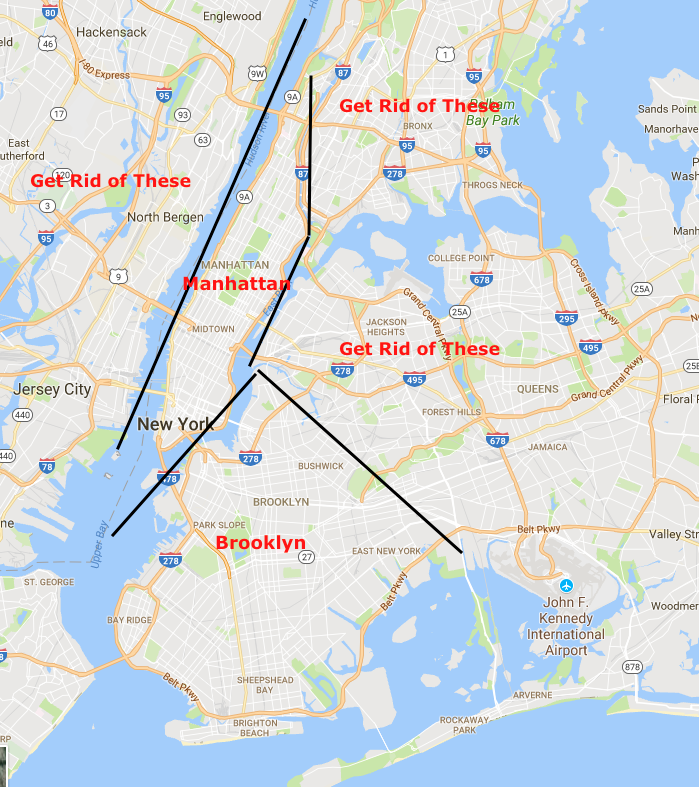

In [19]:
from IPython.display import Image
print('I used GPS coordinates to approximate Manhattan and Brooklyn. They are not perfect, but are roughly 90-95% accurate, so should not throw the distributions off too much.')
print('Source: Google Maps, accessed 10/10/2017 12:15pm. Lines and red text are my own.')
Image(filename="man_brook_slicing.png")

In [20]:
df.drop(['starttime', 'stoptime', 'start station id',
        'start station name', 'start station latitude',
        'start station longitude', 'end station id', 
        'end station name', 'end station latitude',
        'end station longitude', 'usertype', 'gender',
        'bikeid', 'birth year', 'date','index'], axis=1, inplace=True)
df['age'].dropna(inplace= True)
df.head()

,tripduration,time_of_day,night,day,borough,age,manhattan_start,brooklyn_start
0,1346,0,True,False,Manhattan,55.0,True,False
1,363,0,True,False,Manhattan,52.0,True,False
2,346,0,True,False,Manhattan,41.0,True,False
3,182,0,True,False,Brooklyn,46.0,False,True
4,969,0,True,False,Manhattan,38.0,True,False


In [21]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,time_of_day,age
count,482482.000000,482482.000000,474587.000000
mean,652.308302,13.708478,39.910512
std,889.638886,4.888756,11.641436
min,60.000000,0.000000,16.000000
25%,337.000000,9.000000,NaN
50%,505.000000,14.000000,NaN
75%,769.000000,18.000000,NaN
max,43023.000000,23.000000,116.000000


## Daytime vs. Nighttime Trip Duration

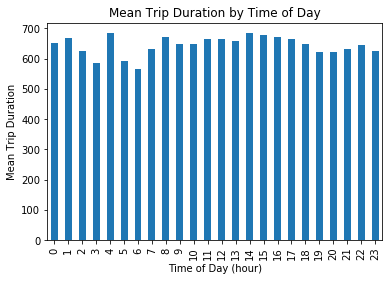

In [22]:
ax = (df.groupby(df.time_of_day).mean().tripduration).plot(kind='bar')
ax.set_ylabel('Mean Trip Duration')
ax.set_xlabel('Time of Day (hour)')
ax.set_title('Mean Trip Duration by Time of Day')

In [23]:
df['trip_durN'] = df.tripduration * df.night
df['trip_durD'] = df.tripduration * df.day
df['trip_durN'] = df.trip_durN.replace(0, NaN)
df['trip_durD'] = df.trip_durD.replace(0, NaN)
df['trip_durN'].dropna(inplace= True)
df['trip_durD'].dropna(inplace= True)
df.head()

,tripduration,time_of_day,night,day,borough,age,manhattan_start,brooklyn_start,trip_durN,trip_durD
0,1346,0,True,False,Manhattan,55.0,True,False,1346.0,NaN
1,363,0,True,False,Manhattan,52.0,True,False,363.0,NaN
2,346,0,True,False,Manhattan,41.0,True,False,346.0,NaN
3,182,0,True,False,Brooklyn,46.0,False,True,182.0,NaN
4,969,0,True,False,Manhattan,38.0,True,False,969.0,NaN


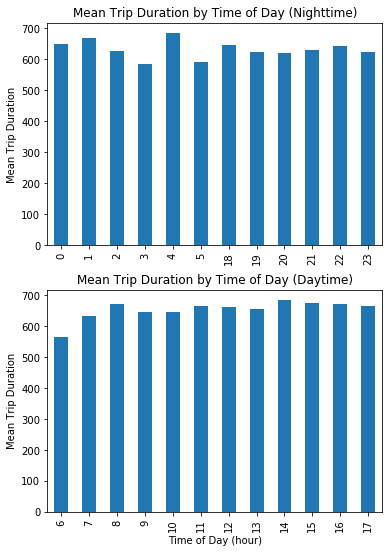

In [24]:
night = df.groupby(df.time_of_day).mean()
fig = plt.figure(figsize=(6,9))
plt.subplot(211)
axN = night.loc[(night.night == 1)].tripduration.plot(kind='bar')
axN.set_ylabel('Mean Trip Duration')
axN.set_xlabel('')
axN.set_title('Mean Trip Duration by Time of Day (Nighttime)')
plt.subplot(212)
axD = night.loc[(night.night == 0)].tripduration.plot(kind='bar')
axD.set_ylabel('Mean Trip Duration')
axD.set_xlabel('Time of Day (hour)')
axD.set_title('Mean Trip Duration by Time of Day (Daytime)')

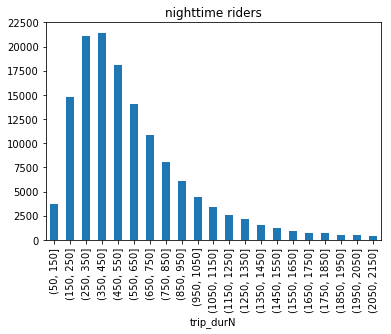

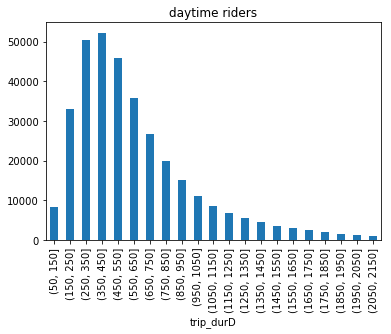

In [25]:
fig = plt.figure(figsize= (10,8))
bins = np.arange(50, 2250, 100)
axM = df.trip_durN.groupby(pd.cut(df.trip_durN, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("nighttime riders")
axB = df.trip_durD.groupby(pd.cut(df.trip_durD, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axB.set_title("daytime riders");

              count_nonzero
trip_durN                  
(50, 150]          0.002879
(150, 250]         0.012889
(250, 350]         0.017414
(350, 450]         0.018892
(450, 550]         0.015559
(550, 650]         0.012488
(650, 750]         0.012757
(750, 850]         0.012555
(850, 950]         0.012366
(950, 1050]        0.012226
(1050, 1150]       0.012166
(1150, 1250]       0.010826
(1250, 1350]       0.010233
(1350, 1450]       0.008041
(1450, 1550]       0.006172
(1550, 1650]       0.004475
(1650, 1750]       0.002788
(1750, 1850]       0.001990
(1850, 1950]       0.000906
(1950, 2050]       0.000449
(2050, 2150]       0.000000


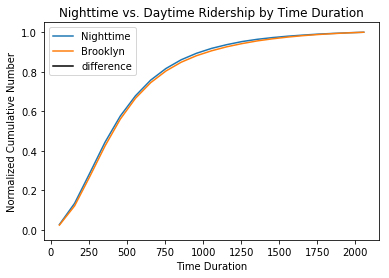

In [26]:
csN=df.trip_durN.groupby(pd.cut(df.trip_durN, bins)).agg([count_nonzero]).cumsum()

csD=df.trip_durD.groupby(pd.cut(df.trip_durD, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csN / csN.max()-csD / csD.max()))

pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Nighttime")
pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Brooklyn")
pl.plot(bins[:-1] + 5, np.sqrt(csD / csD.max() - csN / csN.max())**2, 'k-',
        label = "difference")
pl.xlabel("Time Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()
pl.title('Nighttime vs. Daytime Ridership by Time Duration')

### KS Test

In [28]:
import scipy.stats
df['trip_durN'].dropna(inplace= True)
df['trip_durD'].dropna(inplace= True)

ks = scipy.stats.ks_2samp(df.trip_durN, df.trip_durD)
print(ks)

Ks_2sampResult(statistic=0.022140340541614907, pvalue=1.4782546309765281e-42)


**Description**<br>
The Null Hypothesis states that the two distributions are identical. <br><br>
The 'statistic' returned tells us that the absolute maximum difference between the two CDFs (Day & Night by Trip Duration) is. This appears to correspond with the distance in the normalized graph above in the 40-50 age range, and indeed that is what it refers to - though the maximum point, not the average in that range, which is why we don't see it represented in what we printed out (these were averaged in 5 year increments).<br><br>
More interesting is the p-value here, which is clearly below any threshold we might reasonably set (indeed any threshold but just above 0!), and therefore we reject the null hypothesis, and can claim that the Day and Night ridership by Trip Duration do seem to come from different underlying distributions. 

In [40]:
df['trip_durN'].dropna(inplace= True)
df['trip_durD'].dropna(inplace= True)

np.random.seed(100)
small_trip_durN = np.random.choice(df.trip_durN, int(len(df.trip_durN)/200), replace=False)
small_trip_durD = np.random.choice(df.trip_durD, int(len(df.trip_durD)/200), replace=False)

ks_retest = scipy.stats.ks_2samp(small_trip_durN, small_trip_durD)
print(ks_retest)

Ks_2sampResult(statistic=0.027974690763671917, pvalue=0.82888091289471344)


**Description**<br>
The p-value is many times higher than for the full sample, while the statistic is roughly the same. This suggests that the large size difference in Day vs. Night ridership may have played some role in why the p-value was so small in our initial ks test.

### Pearson's Test

In [41]:
df['trip_durN'].dropna(inplace= True)
df['trip_durD'].dropna(inplace= True)

if len(df.trip_durD) < len(df.trip_durN):
    length = len(df.trip_durD)
else:
    length = len(df.trip_durN)
    
np.random.seed(100)
pearson_trip_durN = np.sort(np.random.choice(df.trip_durN, length, replace=False))
pearson_trip_durD = np.sort(np.random.choice(df.trip_durD, length, replace=False))

prs = scipy.stats.pearsonr(pearson_trip_durN, pearson_trip_durD)
print(prs)

(0.98057858678362597, 0.0)


**Description**<br>
This measures the linear relationship between two datasets. These results suggest a very positive strong correlation between 'x' values, and no correlation between 'y' values.

### Spearman's Test

In [46]:
spearman_trip_durN = np.random.choice(df.trip_durN, length, replace=False)
spearman_trip_durD = np.random.choice(df.trip_durD, length, replace=False)

spm = scipy.stats.spearmanr(spearman_trip_durN, spearman_trip_durD)
print(spm)

SpearmanrResult(correlation=-0.0084299560196690378, pvalue=0.13470488425793067)


**Description**<br>
This implies a very small negative correlation between the two values. The pvalue here is low, and so we cannot reject the null hypothesis. 

## Brooklyn Vs. Manhattan Ridership by Age

In [32]:
df['ageM'] = df.age * df.manhattan_start
df['ageB'] = df.age * df.brooklyn_start
df['ageM'] = df.ageM.replace(0, NaN)
df['ageB'] = df.ageB.replace(0, NaN)
df['ageM'].dropna(inplace= True)
df['ageB'].dropna(inplace= True)
df.head()

,tripduration,time_of_day,night,day,borough,age,manhattan_start,brooklyn_start,trip_durN,trip_durD,ageM,ageB
0,1346,0,True,False,Manhattan,55.0,True,False,1346.0,NaN,55.0,NaN
1,363,0,True,False,Manhattan,52.0,True,False,363.0,NaN,52.0,NaN
2,346,0,True,False,Manhattan,41.0,True,False,346.0,NaN,41.0,NaN
3,182,0,True,False,Brooklyn,46.0,False,True,182.0,NaN,NaN,46.0
4,969,0,True,False,Manhattan,38.0,True,False,969.0,NaN,38.0,NaN


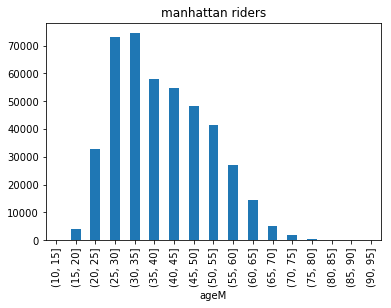

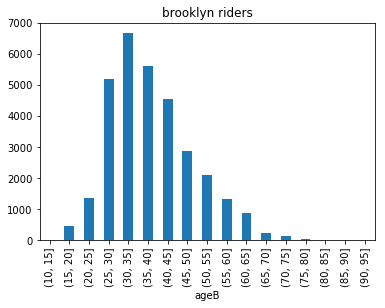

In [33]:
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("manhattan riders")
axB = df.ageB.groupby(pd.cut(df.ageB, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axB.set_title("brooklyn riders");


          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.004614
(20, 25]       0.027229
(25, 30]       0.029965
(30, 35]       0.011232
(35, 40]       0.056226
(40, 45]       0.075658
(45, 50]       0.056672
(50, 55]       0.028329
(55, 60]       0.008749
(60, 65]       0.003195
(65, 70]       0.000475
(70, 75]       0.000668
(75, 80]       0.000328
(80, 85]       0.000085
(85, 90]       0.000064
(90, 95]       0.000000


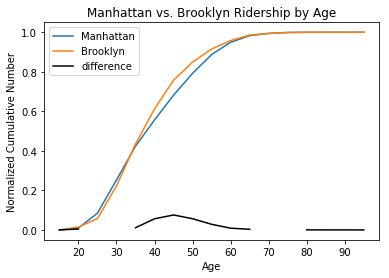

In [34]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csB=df.ageB.groupby(pd.cut(df.ageB, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csB / csB.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "Manhattan")
pl.plot(bins[:-1] + 5, csB / csB.max(), label = "Brooklyn")
pl.plot(bins[:-1] + 5, np.sqrt(csB / csB.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()
pl.title('Manhattan vs. Brooklyn Ridership by Age')

### KS Test

In [35]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageB)
print(ks)

Ks_2sampResult(statistic=0.10158395950192946, pvalue=4.9846240689503636e-264)


**Description**<br>
The Null Hypothesis states that the two distributions are identical. <br><br>
The 'statistic' returned tells us that the absolute maximum difference between the two CDFs (Manhattan & Brooklyn by age) is. This appears to correspond with the distance in the normalized graph above in the 40-50 age range, and indeed that is what it refers to - though the maximum point, not the average in that range, which is why we don't see it represented in what we printed out (these were averaged in 5 year increments).<br><br>
More interesting is the p-value here, which is clearly below any threshold we might reasonably set (indeed any threshold but just above 0!), and therefore we reject the null hypothesis, and can claim that the Manhattan and Brooklyn ridership by age do seem to come from different underlying distributions. 

In [36]:
df['ageM'].dropna(inplace= True)
df['ageB'].dropna(inplace= True)

np.random.seed(100)
small_ageM = np.random.choice(df.ageM, int(len(df.ageM)/200), replace=False)
small_ageB = np.random.choice(df.ageB, int(len(df.ageB)/200), replace=False)

ks_retest = scipy.stats.ks_2samp(small_ageM, small_ageB)
print(ks_retest)

Ks_2sampResult(statistic=0.21823897902351247, pvalue=1.2943482424217315e-06)


**Description**<br>
The p-value is many times higher than for the full sample, while the statistic is only relatively higher. This suggests that the large size difference in Manhattan vs. Brooklyn ridership may have played some role in why the p-value was so small in our initial ks test.

### Pearson's Test

In [42]:
df['ageM'].dropna(inplace= True)
df['ageB'].dropna(inplace= True)

if len(df.ageB) < len(df.ageM):
    length = len(df.ageB)
else:
    length = len(df.ageM)
    
np.random.seed(100)
pearson_ageM = np.sort(np.random.choice(df.ageM, length, replace=False))
pearson_ageB = np.sort(np.random.choice(df.ageB, length, replace=False))

prs = scipy.stats.pearsonr(pearson_ageM, pearson_ageB)
print(prs)

(0.99250730927656838, 0.0)


**Description**<br>
This measures the linear relationship between two datasets. We cannot reject the null hypothesis. These results suggest a very positive strong correlation between 'x' values, and no correlation between 'y' values.

### Spearman's Test

In [45]:
spearman_ageM = np.random.choice(df.ageM, length, replace=False)
spearman_ageB = np.random.choice(df.ageB, length, replace=False)

spm = scipy.stats.spearmanr(spearman_ageM, spearman_ageB)
print(spm)

SpearmanrResult(correlation=-0.0082651160755867932, pvalue=0.14249758776817947)


**Description**<br>
This implies a very small negative correlation between the two values. The pvalue here is low, and so we cannot reject the null hypothesis. 